In [18]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC , SVC

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#c6f79e", "#cbadff"])

In [19]:
X , y = make_moons(n_samples = 200 , noise = 0.1 , random_state = 50)
print(X.shape , y.shape)

(200, 2) (200,)


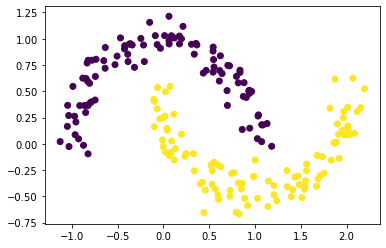

In [20]:
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.show()

In [21]:
# we will make data for testing X_Test2
f1 = np.linspace(X[:,0].min() , X[:,0].max() , 80)
f2 = np.linspace(X[:,1].min() , X[:,1].max() , 80)
f1 , f2 = np.meshgrid(f1 , f2)
X_test2 = np.concatenate([f1.reshape(-1,1) , f2.reshape(-1 , 1)] , axis = 1)
print(X_test2.shape)

(6400, 2)


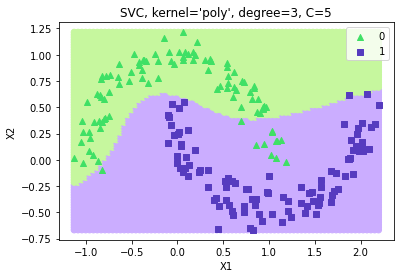

In [22]:
svc = SVC(kernel='poly', degree=3, C=5) 
svc.fit(X,y)
ypred = svc.predict(X_test2)

plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

colors = ["#3fe065", "#563bbf", "#de316a"]
markers = ["^", "s", "*"]
for i in [0,1]:
    samples = (y==i) # i=0, 1, 2
    plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVC, kernel='poly', degree=3, C=5")
plt.show()

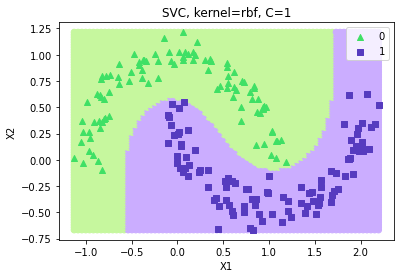

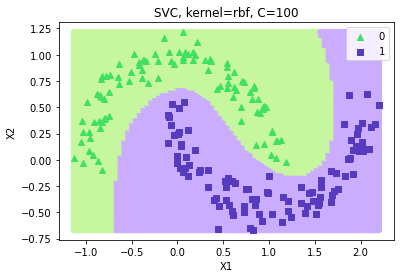

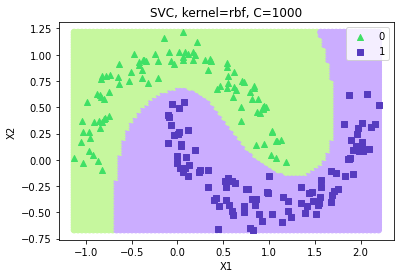

In [23]:
cs = [1, 100, 1000]
ker = 'rbf'
for c in cs: 
    svc = SVC(kernel=ker, C=c) 
    svc.fit(X,y)
    ypred = svc.predict(X_test2)

    plt.scatter(X_test2[:,0], X_test2[:,1], c=ypred, cmap=cmap)

    colors = ["#3fe065", "#563bbf", "#de316a"]
    markers = ["^", "s", "*"]
    for i in [0,1]:
        samples = (y==i) # i=0, 1, 2
        plt.scatter(X[samples,0], X[samples,1], c=colors[i], marker=markers[i], label=i)
    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"SVC, kernel={ker}, C={c}")
    plt.show()